In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [16]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tcav
from src.plots import plot_tsne, plot_pca
from src.concept_vectors import *
from src.util import *
import seaborn as sns

In [4]:
concepts = ["German shepherd","bulldog","Komodo dragon","Gila monster",
                   "cardinal","woodpecker","sweater","three-piece suit","school","house"]
bottlenecks = ["mixed4c"]
experiments_per_concept = 20
concept_vectors = []
concept_metadata = []

In [5]:
for i in concepts:    
    concept_data = load_tcav_vectors(i,bottlenecks)
    assert len(concept_data[1]) == experiments_per_concept
    concept_vectors+=list(concept_data[0])
    concept_metadata+=concept_data[1]
concept_vectors = np.array(concept_vectors)

In [6]:
label_by_concept = [i['concept'] for i in concept_metadata]
label_by_random = [i['random_concept'] for i in concept_metadata]

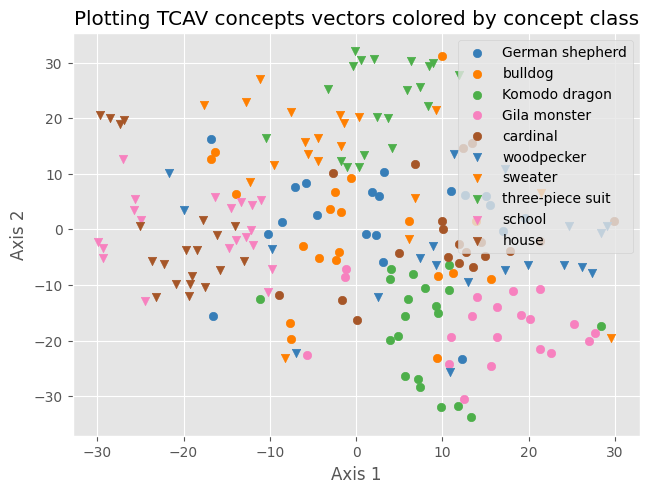

In [7]:
plt.title("Plotting TCAV concepts vectors colored by concept class")
plt.tight_layout()
plot_tsne(concept_vectors,label_by_concept)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.savefig("scripts/Figures/tcav_concept_tsne.png", bbox_inches="tight")

In [8]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
              init='random', perplexity=3).fit_transform(concept_vectors)

In [15]:
distance_by_class = find_average_distances(X_embedded,encode_list(label_by_concept))

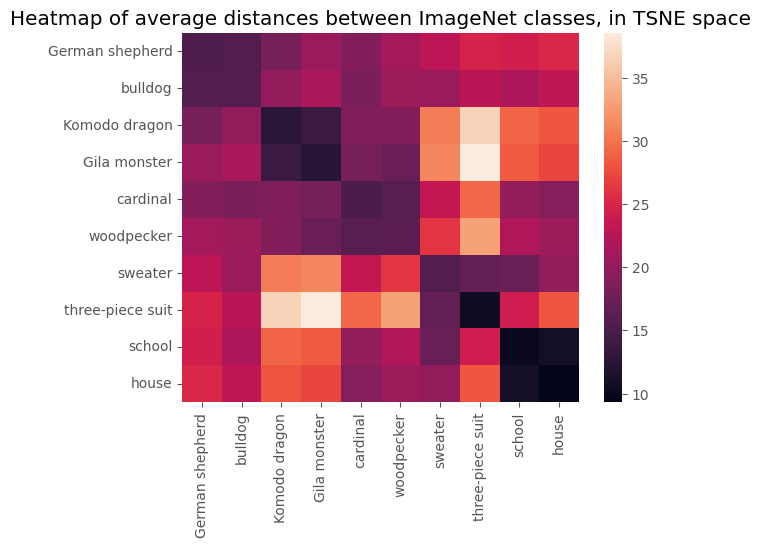

In [21]:
sns.heatmap(distance_by_class,xticklabels=find_unique_in_order(label_by_concept),
            yticklabels=find_unique_in_order(label_by_concept))
plt.title("Heatmap of average distances between ImageNet classes, in TSNE space")
plt.savefig("./scripts/Figures/heatmap_distance_tsne.png",bbox_inches="tight")

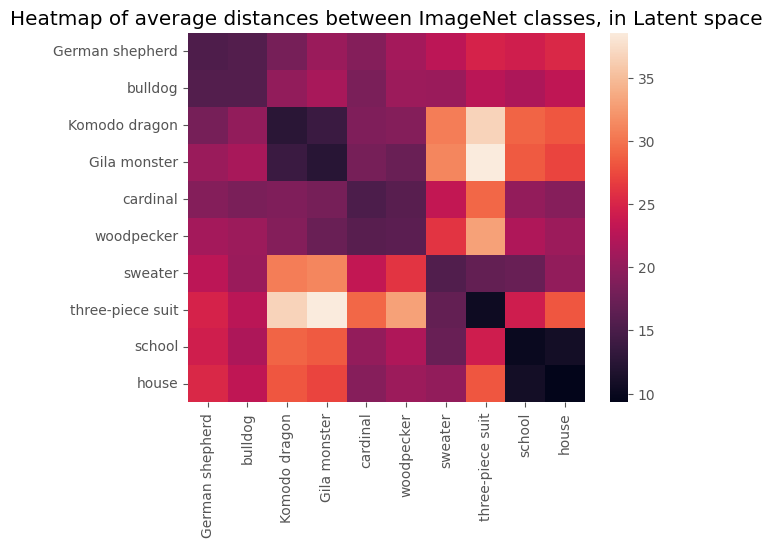

In [22]:
distance_by_class_raw = find_average_distances(concept_vectors,encode_list(label_by_concept))
sns.heatmap(distance_by_class,xticklabels=find_unique_in_order(label_by_concept),
            yticklabels=find_unique_in_order(label_by_concept))
plt.title("Heatmap of average distances between ImageNet classes, in Latent space")
plt.savefig("./scripts/Figures/heatmap_distance_latent.png",bbox_inches="tight")

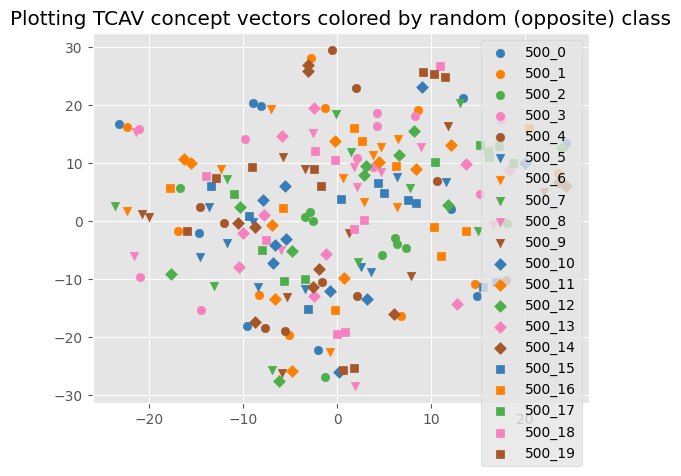

In [11]:
plt.title("Plotting TCAV concept vectors colored by random (opposite) class")
plot_tsne(concept_vectors,label_by_random)